<a href="https://colab.research.google.com/github/QuyenNguyen0611/Tableau-Sales-and-Customer-Dashboard/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load file from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
file_path = '/content/drive/MyDrive/Sales Data.csv'
df = pd.read_csv(file_path, encoding='unicode_escape')

In [4]:
df.shape

(11251, 15)

In [5]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
# Remove unrelated columns
# inplace = True -> modifies data frame directly, not create a new data frame
df.drop(['Status', 'unnamed1'], axis = 1,  inplace=True)

In [8]:
# Check missing values
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [9]:
# Remove missing values
df.dropna(inplace=True)

In [10]:
# Check missing values again
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [11]:
# Change data type
df['Amount'] = df['Amount'].astype('int64')
df['Amount'].dtypes

dtype('int64')

In [12]:
# # Display summary statistics for numerical columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [13]:
# Calculate total sales
total_sales = df['Amount'].sum()
total_sales

106249129

# Exploratory Data Analysis

**Define functions**

In [14]:
# Define colors
colors = ['#7B3F00', '#FFFDD0']

def get_color_palette(n):
    """Generate a color palette with n colors."""
    return sns.blend_palette(colors, n_colors=n)

In [15]:
def format_axis_label(value):
    """
    Format a number into readable labels.
    - Millions: 1.2M
    - Thousands: 1.2K
    - Normal number: 1.2
    """
    if value >= 1e6:
        return f'{value / 1e6:.1f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.1f}K'
    else:
        return f'{value:.1f}'

def add_labels(ax, orientation='y'):
    """
    Add formatted labels to a bar chart for either x-axis or y-axis.
    - ax: The axes object of the plot.
    - orientation: 'x' or 'y', to specify axis to label.
    """
    for bar in ax.patches:
        value = bar.get_height() if orientation == 'y' else bar.get_width()
        if value > 0:  # Skip zero values
            label = format_axis_label(value)
            position = (bar.get_x() + bar.get_width() / 2, value) if orientation == 'y' else (value, bar.get_y() + bar.get_height() / 2)
            ax.text(*position, label, ha='center' if orientation == 'y' else 'left', va='bottom' if orientation == 'y' else 'center')


In [16]:
def millions_formatter(x, _):
    if x >= 1e6:  # Millions
        return f'{x/1e6:.0f}M'
    elif x >= 1e3:  # Thousands
        return f'{x/1e3:.0f}K'
    else:  # Less than 1K
        return f'{x:.0f}'

**Gender**

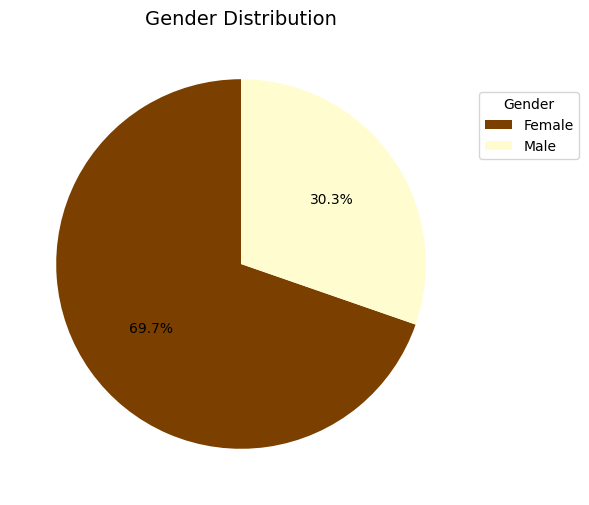

In [17]:
# Count the number of occurrences for each gender
gender_counts = df['Gender'].value_counts()

# Create pie chart
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the pie chart
wedges, texts, autotexts = ax.pie(
    gender_counts,
    autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
    colors=colors,
    startangle=90
)

# Add title and legend
ax.set_title("Gender Distribution", fontsize=14)
ax.legend(wedges, ['Female', 'Male'], title="Gender", loc="center left", bbox_to_anchor=(1, 0.8))

plt.show()

In [18]:
# Calculate sales by gender
sales_by_gender = df.groupby('Gender')['Amount'].sum()
sales_by_gender

,Amount
Gender,
F,74335853
M,31913276


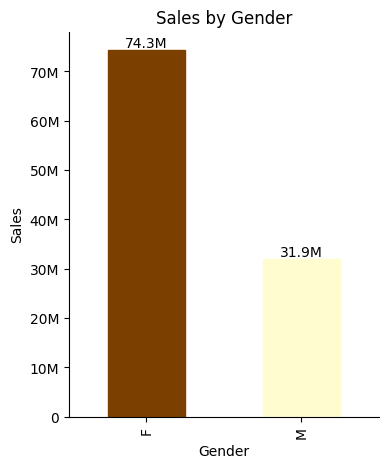

In [19]:
# Define size for figure
plt.figure(figsize=(4, 5))
ax = sales_by_gender.plot(kind='bar')
for i, bars in enumerate(ax.patches):
    bars.set_color(colors[i % len(colors)])
add_labels(ax, orientation='y')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(millions_formatter))
ax.set_title('Sales by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Sales')
# Remove the chart border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

*Most of the buyers are female, and the amount of sales generated by female buyers is significantly higher compared to male buyers.*

**Age**

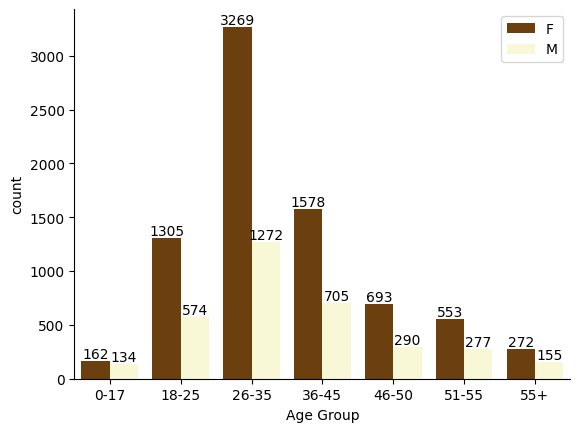

In [20]:
# Ensure the desired order of Age Group
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
df['Age Group'] = pd.Categorical(df['Age Group'], categories=age_order, ordered=True)

# Create the bar chart with the specified order
ax = sns.countplot(x='Age Group', data=df, hue='Gender', palette=colors)

# Add labels on top of the bars
for bars in ax.containers:
    ax.bar_label(bars)

# Update legend text color (set F and M to black)
legend = ax.legend()
for text in legend.get_texts():
    text.set_color('black')

# Remove the chart border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

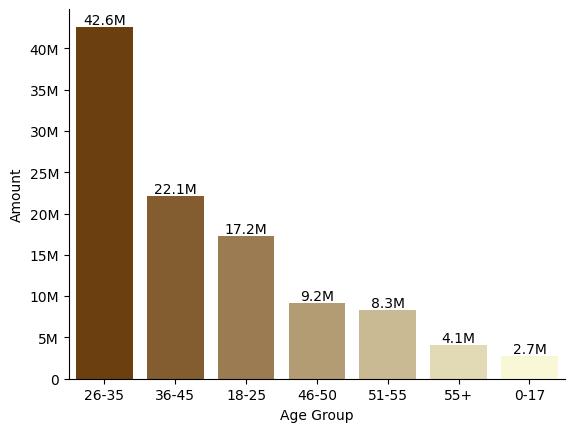

In [21]:
# Group and sort sales by age group in descending order
sales_age = df.groupby(['Age Group'], as_index=False, observed=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Create bar chart with a single color gradient
color_set = get_color_palette(len(sales_age))

ax = sns.barplot(
    x='Age Group',
    y='Amount',
    data=sales_age,
    order=sales_age['Age Group'],
    palette=color_set,
)

add_labels(ax, orientation='y')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(millions_formatter))
# Remove the chart border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

*From the above charts, the majority of buyers are in the 26-35 age group, with females making up the larger proportion.*

**State**

In [22]:
# Total number of orders from top 10 states
orders_state = df.groupby(['State'], as_index=False, observed=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
orders_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


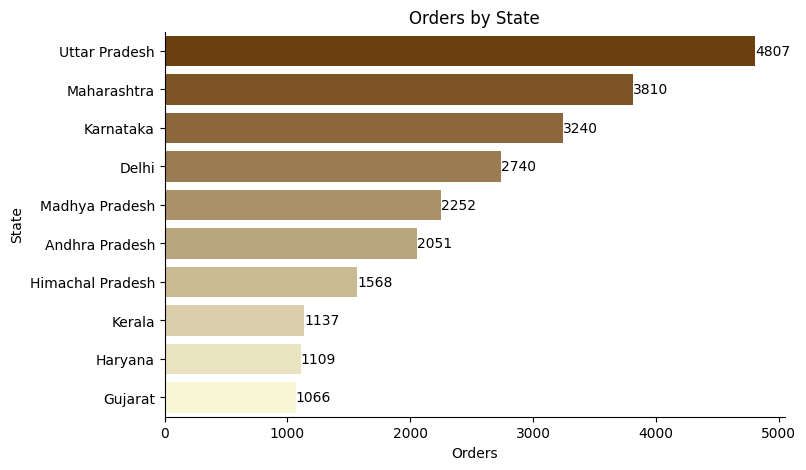

In [23]:
# Create bar chart for state vs total orders
color_set = get_color_palette(len(orders_state))
# Define size for figure
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x='Orders',
    y='State',
    data=orders_state,
    palette=color_set,
)

# Add title and labels for the bars
ax.set_title('Orders by State')
for bars in ax.containers:
    ax.bar_label(bars)

# Remove the chart border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


In [24]:
# Total amount of sales from top 10 states
sales_state = df.groupby(['State'], as_index=False, observed=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sales_state

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


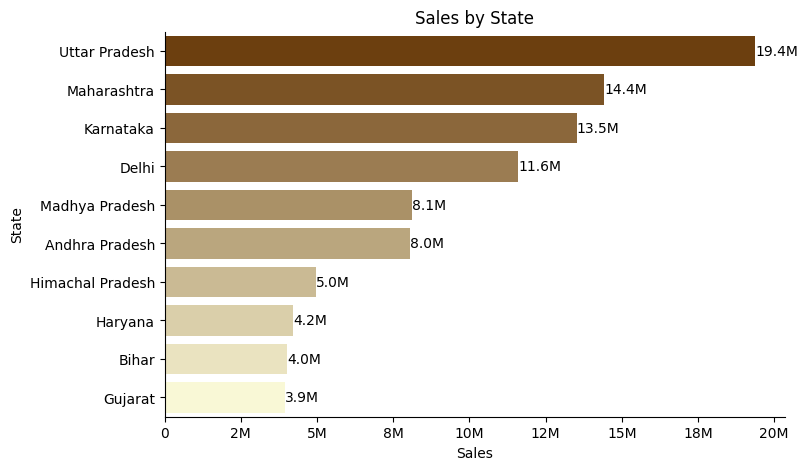

In [25]:
# Create bar chart for state vs total sales
color_set = get_color_palette(len(sales_state))
# Define size for figure
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x='Amount',
    y='State',
    data=sales_state,
    palette=color_set,
)
# Add title and label
ax.set_title('Sales by State')
add_labels(ax, orientation='x')
ax.set_xlabel('Sales')
ax.xaxis.set_major_formatter(mtick.FuncFormatter(millions_formatter))

# Remove the chart border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

*Most of orders and total of sales are from Uttar Pradesh, Maaharashtra, and Karnataka*

**Marital Status**

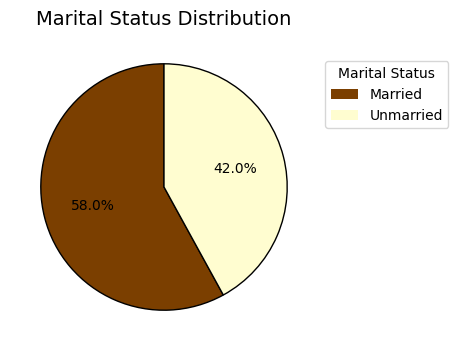

In [26]:
# Prepare data for the pie chart
marital_status_counts = df['Marital_Status'].value_counts()
labels = marital_status_counts.index
sizes = marital_status_counts.values

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    sizes,
    colors=colors,
    autopct='%1.1f%%',  # Display percentages with one decimal place
    startangle=90,  # Rotate the chart for better layout
    wedgeprops={'edgecolor': 'black'},  # Add edge color for better visibility
)

# Add a title
plt.title('Marital Status Distribution', fontsize=14)
plt.legend(wedges, ['Married', 'Unmarried'], title='Marital Status', loc='center left', bbox_to_anchor=(1, 0.8))

# Display the chart
plt.show()


In [27]:
# Group the data by 'Marital_Status' and 'Gender', and calculate the total sales for each group
marital_status = df.groupby(['Marital_Status', 'Gender'], as_index=False, observed=False)['Amount'].sum()
marital_status

,Marital_Status,Gender,Amount
0,0,F,43786646
1,0,M,18338738
2,1,F,30549207
3,1,M,13574538


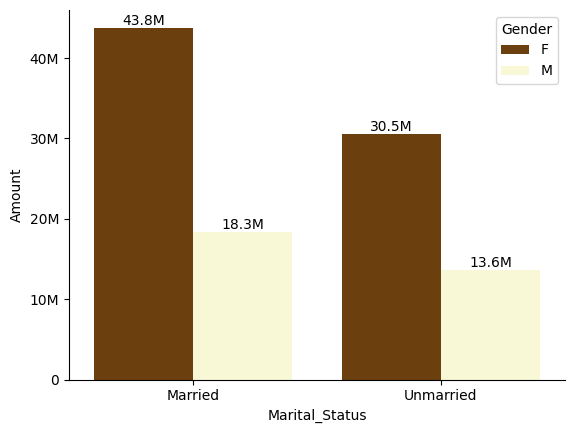

In [28]:
# Create bar chart for marital status, gender vs amount
ax = sns.barplot(
    x='Marital_Status',
    y='Amount',
    hue='Gender',
    data=marital_status,
    palette=colors,
)

# Map 0 to 'Married' and 1 to 'Unmarried' on the x-axis
plt.xticks([0, 1], ['Married', 'Unmarried'])
add_labels(ax, orientation='y')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(millions_formatter))
# Remove the chart border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

*From the above charts, we can see that most buyers are married women, and they exhibit high purchasing power.*

**Occupation**

In [29]:
# Total orders from top 10 occupations
orders_occupations = df.groupby(['Occupation'], as_index=False, observed=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
orders_occupations

,Occupation,Orders
10,IT Sector,3997
8,Healthcare,3455
2,Aviation,3215
3,Banking,2817
7,Govt,2155
9,Hospitality,1739
12,Media,1596
1,Automobile,1371
11,Lawyer,1344
4,Chemical,1309


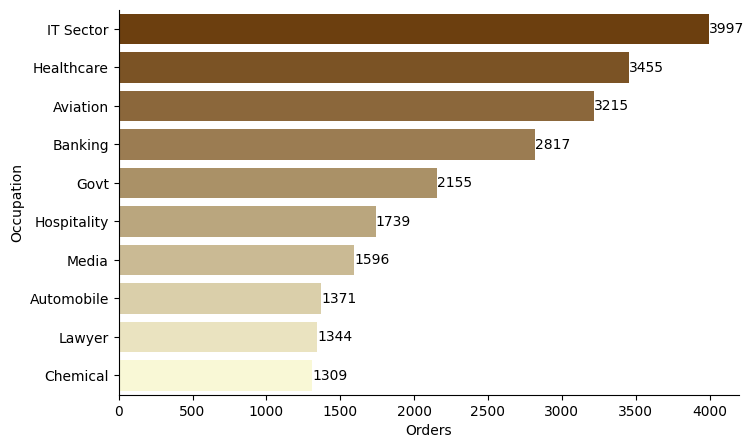

In [30]:
# Create charts for top occupation
color_set = get_color_palette(len(orders_occupations))
plt.style.use('default') # Change background into white
# Define size for figure
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x='Orders',
    y='Occupation',
    data=orders_occupations,
    palette=color_set
)

# Add label for each bar
for bars in ax.containers:
    ax.bar_label(bars)
# Remove the chart border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [31]:
# Total sales vs occupation
sales_occupations = df.groupby(['Occupation'], as_index=False, observed=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sales_occupations

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


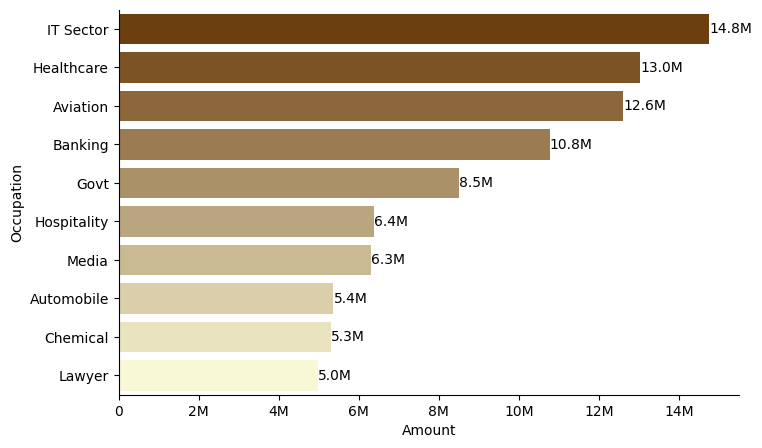

In [32]:
# Create chart for sales vs occupation
color_set = get_color_palette(len(sales_occupations))
plt.style.use('default')
# Define size for figure
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x='Amount',
    y='Occupation',
    data=sales_occupations,
    palette=color_set
)

add_labels(ax, orientation='x')

ax.xaxis.set_major_formatter(mtick.FuncFormatter(millions_formatter))

# Remove the chart border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

*From above charts, we can see that most of buyer are working in IT sector, healthcare and aviation*

**Product Category**

In [33]:
product_category = df.groupby(['Product_Category'], as_index=False, observed=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
product_category

,Product_Category,Orders
3,Clothing & Apparel,6634
6,Food,6110
5,Electronics & Gadgets,5226
7,Footwear & Shoes,2646
11,Household items,1331
1,Beauty,1086
9,Games & Toys,940
8,Furniture,889
14,Sports Products,870
13,Pet Care,536


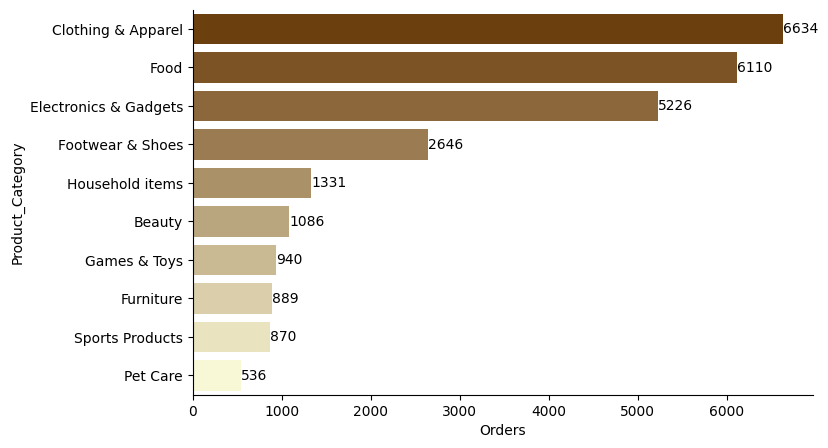

In [34]:
# Create chart for order and product category
color_set = get_color_palette(len(product_category))
plt.style.use('default')
# Define size for figure
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x='Orders',
    y='Product_Category',
    data=product_category,
    palette=color_set,
)

for bar in ax.containers:
  ax.bar_label(bar)

# Remove the chart border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [35]:
# Product vs sales
product_sales = df.groupby(['Product_Category'], as_index=False, observed=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
product_sales

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


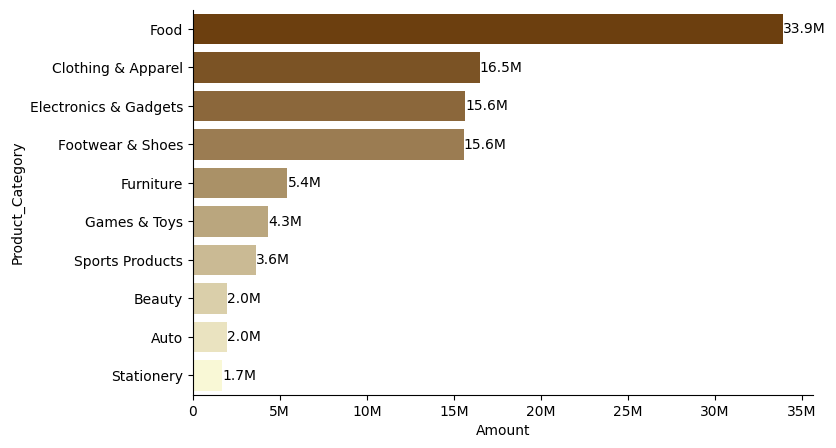

In [36]:
# Create chart for sales vs product
color_set = get_color_palette(len(product_sales))
plt.style.use('default')
# Define size for figure
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x='Amount',
    y='Product_Category',
    data=product_sales,
    palette=color_set
)

# Remove the chart border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

add_labels(ax, orientation='x')
ax.xaxis.set_major_formatter(mtick.FuncFormatter(millions_formatter))


*From above charts, we can see that the most of sold product are from food, clothing, electronics category*

# Conclusion

1. Total Sales: 106.25M, majority from female buyers.
2. Marital Status: Married buyers spend more, likely for family needs.
3. Top Categories: Food, clothing, and electronics dominate sales.
4. Occupations: Buyers mostly work in IT, healthcare, and aviation.
5. Age Group: Majority are 26-35 years old, with females leading.
